<a href="https://colab.research.google.com/github/mahin-arvind/GTD-EDA/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [66]:
import pandas as pd
import numpy as np


In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The csv file doesn't have default character encoding UTF-8 making it unable to read. Hence, ISO-8859-1 encoding is used

In [68]:
filepath = '/content/drive/MyDrive/AlmaBetter/EDA CAPSTONE/Global Terrorism Data.csv'
gta_df = pd.read_csv(filepath, encoding = "ISO-8859-1", engine='python')

Viewing the head and tail samples of the given dataset

In [69]:
gta_df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [70]:
gta_df.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

The Global Terrorism Dataset has 135 attributes


In [71]:
gta_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Relevant Columns are chosen with the help of the [GTA CodeBook](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)

In [72]:
useful_columns = ['eventid','iyear','country_txt', 'region_txt','city','crit1','crit2','crit3','attacktype1','attacktype1_txt',
                  'success','suicide','weaptype1','weaptype1_txt','targtype1','targtype1_txt','nwound', 'gname','claimed','nkill',
                  ]


In [73]:
gta_df = gta_df.loc[:, useful_columns]

#Data Exploration

The new dataframe will be used to perform the analysis. The samples of the head and tail are displayed down below

In [74]:
gta_df.head(5)

,eventid,iyear,country_txt,region_txt,city,crit1,crit2,crit3,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,nwound,gname,claimed,nkill
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,1,1,1,1,Assassination,1,0,13,Unknown,14,Private Citizens & Property,0.0,MANO-D,NaN,1.0
1,197000000002,1970,Mexico,North America,Mexico city,1,1,1,6,Hostage Taking (Kidnapping),1,0,13,Unknown,7,Government (Diplomatic),0.0,23rd of September Communist League,NaN,0.0
2,197001000001,1970,Philippines,Southeast Asia,Unknown,1,1,1,1,Assassination,1,0,13,Unknown,10,Journalists & Media,0.0,Unknown,NaN,1.0
3,197001000002,1970,Greece,Western Europe,Athens,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,7,Government (Diplomatic),NaN,Unknown,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,1,1,1,7,Facility/Infrastructure Attack,1,0,8,Incendiary,7,Government (Diplomatic),NaN,Unknown,NaN,NaN


In [75]:
gta_df.tail(5)

,eventid,iyear,country_txt,region_txt,city,crit1,crit2,crit3,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,nwound,gname,claimed,nkill
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,1,0,2,Armed Assault,1,0,5,Firearms,4,Military,2.0,Al-Shabaab,1.0,1.0
181687,201712310029,2017,Syria,Middle East & North Africa,Jableh,1,1,0,3,Bombing/Explosion,1,0,6,Explosives,4,Military,7.0,Muslim extremists,0.0,2.0
181688,201712310030,2017,Philippines,Southeast Asia,Kubentog,1,1,1,7,Facility/Infrastructure Attack,1,0,8,Incendiary,14,Private Citizens & Property,0.0,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0
181689,201712310031,2017,India,South Asia,Imphal,1,1,1,3,Bombing/Explosion,0,0,6,Explosives,2,Government (General),0.0,Unknown,0.0,0.0
181690,201712310032,2017,Philippines,Southeast Asia,Cotabato City,1,1,1,3,Bombing/Explosion,0,0,6,Explosives,20,Unknown,0.0,Unknown,0.0,0.0


In [76]:
gta_df.describe()

,eventid,iyear,crit1,crit2,crit3,attacktype1,success,suicide,weaptype1,targtype1,nwound,claimed,nkill
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,165380.000000,115571.000000,171378.000000
mean,2.002705e+11,2002.638997,0.988530,0.993093,0.875668,3.247547,0.889598,0.036507,6.447325,8.439719,3.167668,0.049666,2.403272
std,1.325957e+09,13.259430,0.106483,0.082823,0.329961,1.915772,0.313391,0.187549,2.173435,6.653838,35.949392,1.093195,11.545741
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-9.000000,0.000000
25%,1.991021e+11,1991.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,6.000000,4.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,6.000000,14.000000,2.000000,0.000000,2.000000
max,2.017123e+11,2017.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,13.000000,22.000000,8191.000000,1.000000,1570.000000


Observation: The maximum amount of fatalities an even has claimed is 1570

In [77]:
gta_df[gta_df['nkill']== 1570]

,eventid,iyear,country_txt,region_txt,city,crit1,crit2,crit3,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,nwound,gname,claimed,nkill
133518,201406150063,2014,Iraq,Middle East & North Africa,Tikrit,1,1,0,6,Hostage Taking (Kidnapping),1,0,5,Firearms,4,Military,NaN,Islamic State of Iraq and the Levant (ISIL),1.0,1570.0


The Civil War between Iraq and Islamic State of Iraq and the Levant (ISIL) has claimed the most amount of fatalities

###CHECKING FOR NULL VALUES

In [78]:
gta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   country_txt      181691 non-null  object 
 3   region_txt       181691 non-null  object 
 4   city             181257 non-null  object 
 5   crit1            181691 non-null  int64  
 6   crit2            181691 non-null  int64  
 7   crit3            181691 non-null  int64  
 8   attacktype1      181691 non-null  int64  
 9   attacktype1_txt  181691 non-null  object 
 10  success          181691 non-null  int64  
 11  suicide          181691 non-null  int64  
 12  weaptype1        181691 non-null  int64  
 13  weaptype1_txt    181691 non-null  object 
 14  targtype1        181691 non-null  int64  
 15  targtype1_txt    181691 non-null  object 
 16  nwound           165380 non-null  floa

In [79]:
for i, col in gta_df.iteritems():
  if col.dtype == 'int64':
    print(col.name)


eventid
iyear
crit1
crit2
crit3
attacktype1
success
suicide
weaptype1
targtype1


Attributes 'claimed', 'nkill' and 'nwound' have null values.

###Handling null values

1) 'claimed'

Down below are the unique values in the column 'claimed'. Here, -9 indicates that the data was unavailable at the time. Null values will be replaced by -9 as dropping the rows will eliminate almost 8000 columns 

In [80]:
gta_df['claimed'].fillna(-9, inplace = True)

In [81]:
gta_df[gta_df['claimed'].isna()]['claimed'].count()

0

2) 'nkill'

Null values of nkill is replaced by the median value of nkill 

In [82]:
gta_df['nkill'].median()

0.0

In [83]:
gta_df['nkill'].fillna(0, inplace = True)

3)'nwound'

In [84]:
gta_df['nwound'].median()

0.0

In [85]:
gta_df['nkill'].fillna(0, inplace = True)

Converting year to DateTime 

In [86]:
gta_df['iyear'] = pd.to_datetime(gta_df['iyear'], format = '%Y')

###Correlation

Importing required libraries for visualizing 

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [88]:
corrdf = gta_df.corr(method = 'spearman')

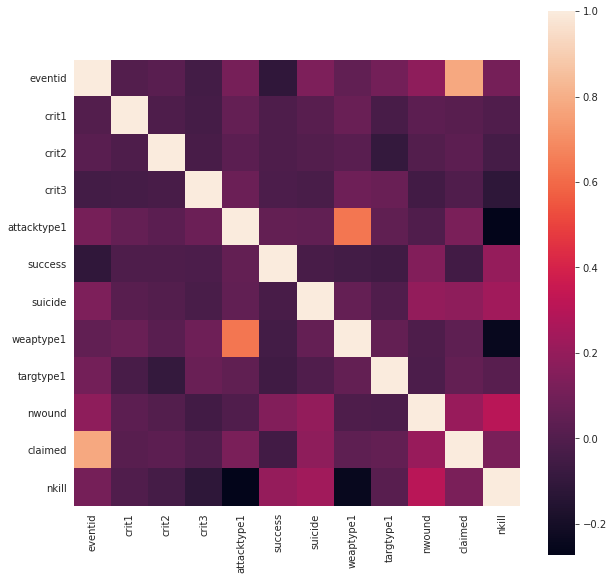

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(corrdf,square = True)

Correlation observed seems very insubstantial because most of the data is categorical. The only numerical correlation that can be considered is between 'nkill'(Fatalities) and 'nwound'(Wounded)

Visualizing relation between number Fatalities and Wounded victims


Text(0.5, 85.99999999999991, 'Fatalities')

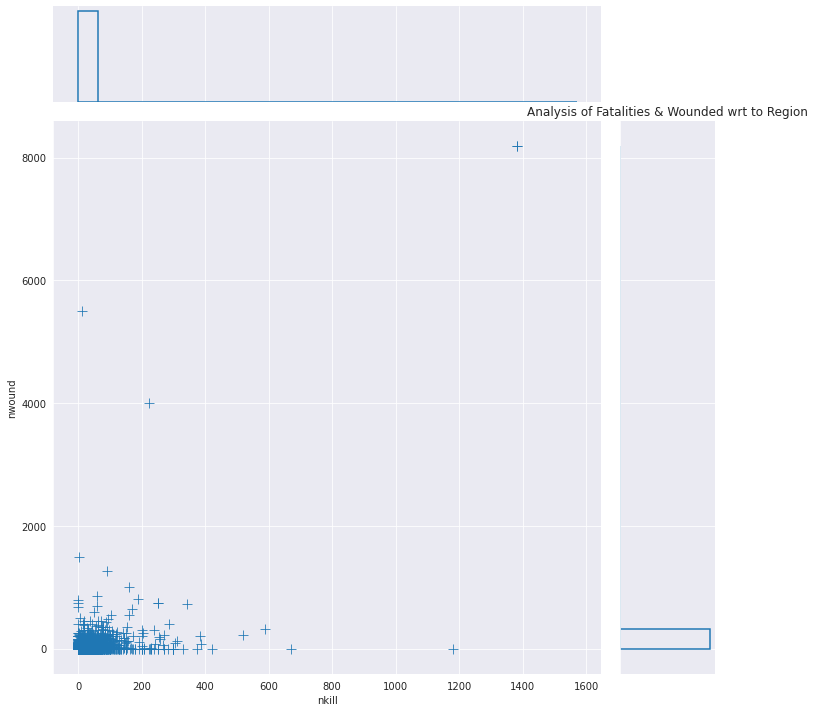

In [90]:
sns.jointplot(data= gta_df, x="nkill", y="nwound",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False), height = 10)
plt.title("Analysis of Fatalities & Wounded wrt to Region")
plt.ylabel("Wounded")
plt.xlabel("Fatalities")

##Doing Correlation with One Hot Encoding


In [91]:
clms = ['country_txt', 'region_txt','crit1','crit2','crit3','attacktype1_txt',
                  'success','suicide','weaptype1_txt','targtype1_txt','gname','claimed'] 
ohdf = gta_df.copy()


In [92]:
pd.get_dummies(ohdf.weaptype1_txt, prefix= "weaptype")

,weaptype_Biological,weaptype_Chemical,weaptype_Explosives,weaptype_Fake Weapons,weaptype_Firearms,weaptype_Incendiary,weaptype_Melee,weaptype_Other,weaptype_Radiological,weaptype_Sabotage Equipment,weaptype_Unknown,"weaptype_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,0,0,0,0,1,0,0,0,0,0,0,0
181687,0,0,1,0,0,0,0,0,0,0,0,0
181688,0,0,0,0,0,1,0,0,0,0,0,0
181689,0,0,1,0,0,0,0,0,0,0,0,0


#Analysis Terror Attacks by Organisation

##Checking Pareto's 80-20 Principle for fatalities
The Pareto Principle, named after esteemed economist Vilfredo Pareto, specifies that 80% of consequences come from 20% of the causes, asserting an unequal relationship between inputs and outputs. This principle serves as a general reminder that the relationship between inputs and outputs is not balanced.

In [93]:
a=gta_df[gta_df['gname']!= 'Unknown']
a = a.groupby(['gname']).agg({'nkill':'sum',}).sort_values(['nkill'], ascending = False)
totalG = a.shape[0] #No. of Terrorist Organisations is 3536

In [94]:
top20 = a.sort_values(['nkill'], ascending = False).head(round(totalG*0.2))
topG = a.shape[0] #20% of Terrorist organisations is 707

In [95]:
CausePercent = (top20.nkill.sum()/a.nkill.sum())*100
CausePercent

98.8554295311201

The top 20% of the Terrorist Organisations have contributed to almost 99% of the crimes. This clearly shows the unequal relationship between inputs and outputs. The principle has been satisfied.



##Most Notorious Terror Organisations


We plot the top 10 

In [96]:
a = gta_df.groupby(['gname']).agg({'eventid':'count', 'nkill': 'sum'}).sort_values(['nkill', 'eventid'], ascending=False)
top20 = a.drop('Unknown', axis=0).head(10).reset_index().copy()
rest = a.iloc[11:,:].agg({'eventid':'count', 'nkill':'sum'}).copy()
lst = rest.to_list()
top20.loc[len(top20.index)] = ['Remaining 3217 Terrorist Organisations'] + lst
trof = a.index[:10] #List of Terrorist organisations with Highest Fatlities

Text(0, 0.5, '')

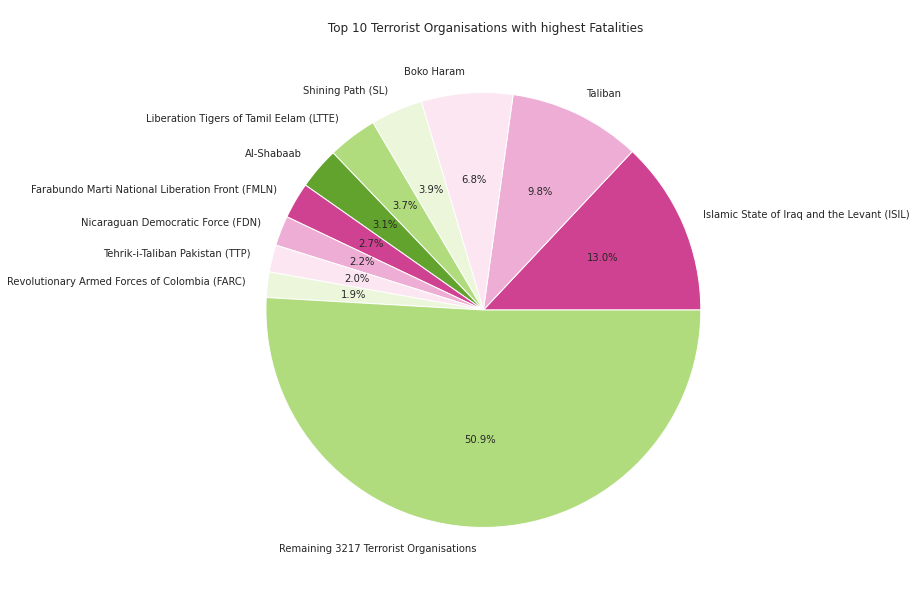

In [97]:
plt.rcParams['figure.figsize'] = (10,10)
top20.set_index('gname').plot(x= 'gname', y='nkill',kind='pie', legend=False,colors= sns.color_palette(palette = 'PiYG'),autopct='%1.1f%%')
plt.yticks(rotation = 45)
plt.title("\n Top 10 Terrorist Organisations with highest Fatalities")
plt.ylabel("")

In [98]:
a = gta_df.groupby(['gname']).agg({'eventid':'count', 'nkill': 'sum'}).sort_values(['eventid','nkill'], ascending=False)
top20 = a.drop('Unknown', axis=0).head(10).reset_index().copy()
rest = a.iloc[11:,:].agg({'eventid':'count', 'nkill':'sum'}).copy()
lst = rest.to_list()
top20.loc[len(top20.index)] = ['Remaining 3217 Terrorist Organisations'] + lst
troa = a.index[:10] #List of 20 Terrorist organisations with highest activities

Text(0, 0.5, '')

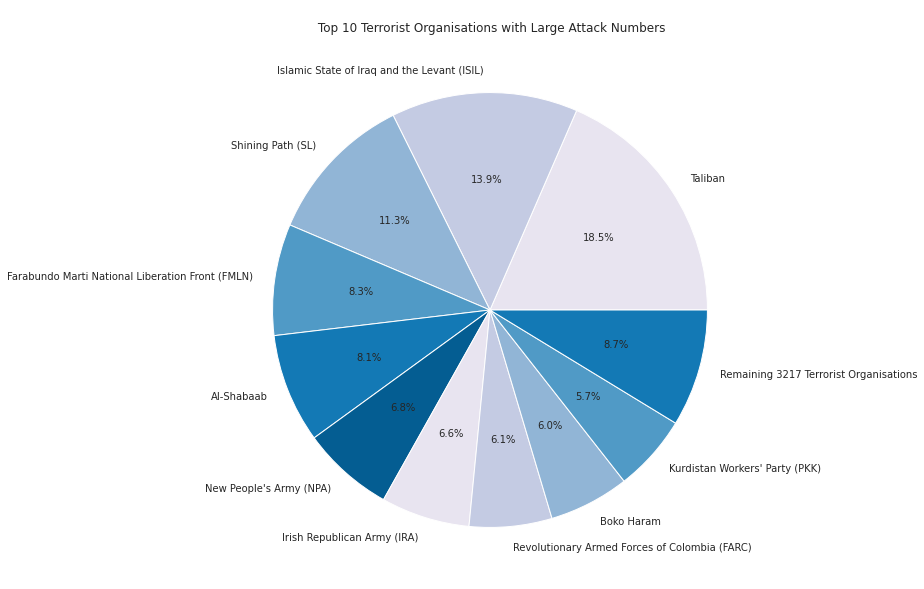

In [99]:
plt.rcParams['figure.figsize'] = (10,10)
top20.set_index('gname').plot(x= 'gname', y='eventid',kind='pie', legend=False,colors= sns.color_palette(palette = 'PuBu'), 
                              autopct='%1.1f%%')
plt.title("\n Top 10 Terrorist Organisations with Large Attack Numbers")
plt.ylabel("")


Inference:
The most notorious terrorist organisations are 
1. Islamic State of Iraq and the Levant (ISIL)
2. Taliban
3. Boko Haram
4. Shining Path(SL)

These organisations alone have contributed to more than one third of the total fatalities and almost 50% of the total attacks

##Analysis by Activity

Plotting the activities of top 25 terrorist organisations with most fatalities and attacks from 1970 through 2017

In [100]:
orgs = troa.union(trof)
orgs = orgs.delete(-1)

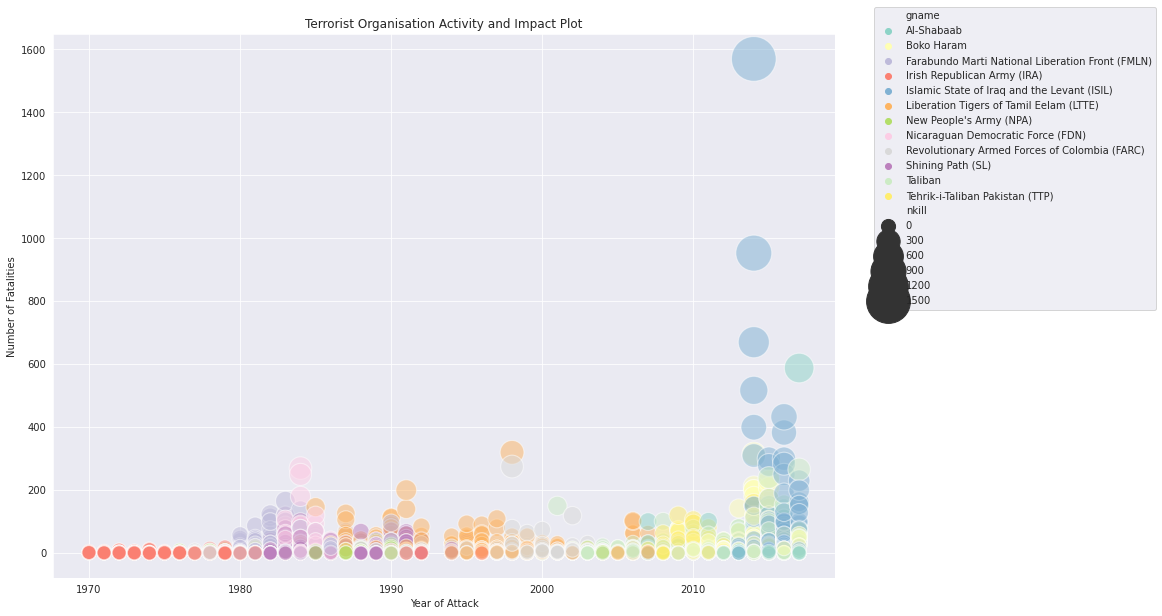

In [111]:
fig, ax = plt.subplots(figsize = (14,10))
df = gta_df.loc[gta_df['gname'].isin(orgs)]
orgimpct = sns.scatterplot(data = df, x = 'iyear', y='nkill', hue = 'gname', hue_order=orgs,
                size= 'nkill',sizes = (200,2000), palette= 'Set3', legend = True, alpha = 0.5,
               )
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=0)
plt.xlabel("Year of Attack")
plt.ylabel("Number of Fatalities")
plt.title("Terrorist Organisation Activity and Impact Plot")
plt.show()


**Inferences**

Islamic State of Iraq and the Levant (ISIL) (Blue Spots) and Taliban (Dark Green Spots)  are active from the mid 2010's and Boko Haram (Lemon Yellow Spots) are active from 2010. 

Liberation Tigers of Tamil Eelam (LTTE) (Orange Spots) are active from late 1980's. Their attacks peaked in mid 1990's and reduced in 2000's.

The Irish Republican Army (IRA) (Red Spots) have made their attacks constantly from 1970's to 1980's.

#Analysing Terror Attacks by Region


##Global

Text(0.5, 0, 'Year')

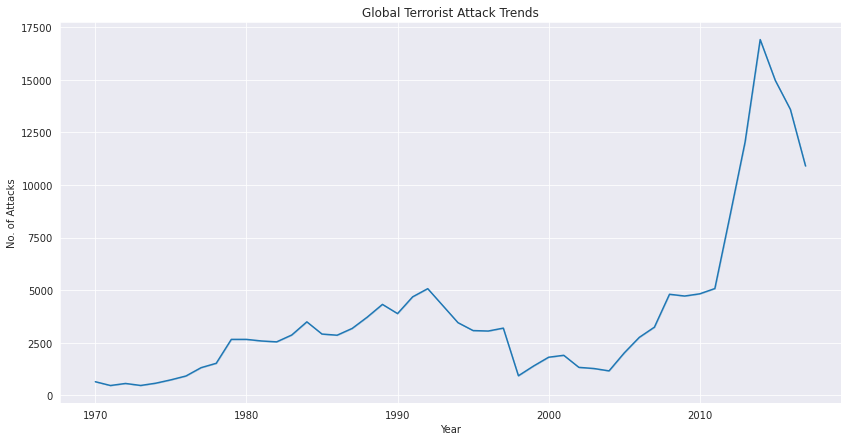

In [112]:
fig, ax = plt.subplots(figsize = (14,7))
sns.lineplot(x='iyear', y='eventid',data= gta_df,estimator= np.count_nonzero, palette= 'bright')

plt.ylabel("No. of Attacks")
plt.title("Global Terrorist Attack Trends")
plt.xlabel("Year")

Global Terrorism started increasing to an all time high from 2011. This peaked in the year 2014 and started dipping ever since

##Comparing Global Trends of terrorist attack per year with Regional Trends of terrorist attack per year

Text(0.5, 0, 'Year')

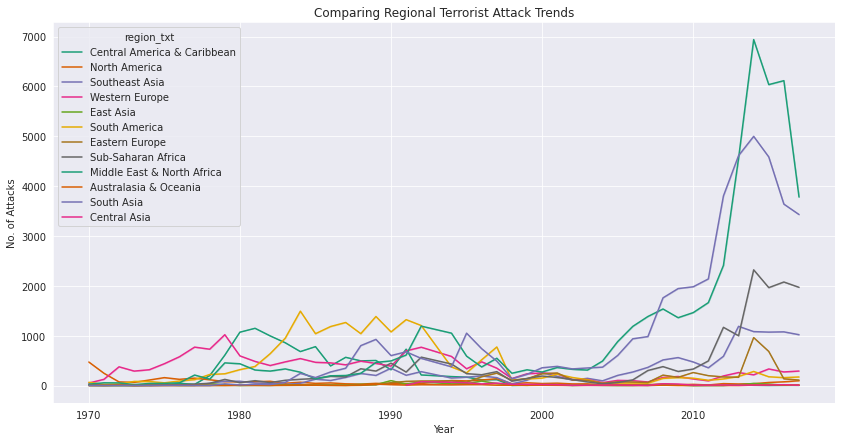

In [113]:
fig, ax = plt.subplots(figsize = (14,7))
sns.lineplot(x='iyear', y='eventid',data= gta_df,hue = 'region_txt',estimator= np.count_nonzero, palette= 'Dark2')
plt.ylabel("No. of Attacks")
plt.title("Comparing Regional Terrorist Attack Trends")
plt.xlabel("Year")

By comparing the spikes and dips of Middle East & North Africa and Southeast Asia with the Global trends from late 90's, we can reasonably speculate that the three regions plays a vital role in affecting global terrorism

**Close Comparison**

Blue Line indicates the Global Trend. The sum of distance under the curves of South Asia and Middle East & North Africa is more than 50% of the distance under the curve of Global. Using this observation we can tell that regions South Asia and Middle East & North Africa play an impactful role in Global Terrorism 


Text(0.5, 0, 'Year')

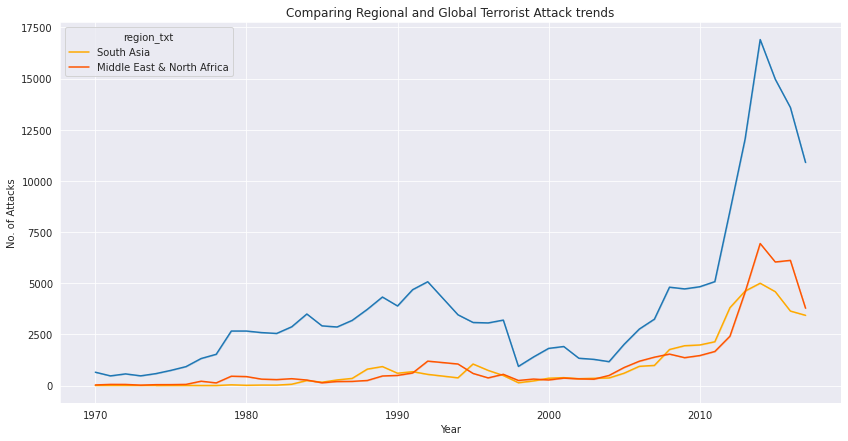

In [104]:
regions = ['South Asia','Middle East & North Africa']
fig, ax = plt.subplots(figsize = (14,7))
sns.lineplot(x='iyear', y='eventid',data= gta_df , estimator= np.count_nonzero)
sns.lineplot(x='iyear', y='eventid',data= gta_df,hue= 'region_txt',hue_order= regions,estimator= np.count_nonzero, palette='autumn_r')
plt.ylabel("No. of Attacks")
plt.title("Comparing Regional and Global Terrorist Attack trends")
plt.xlabel("Year")

##Fatalities of Terrorist Attacks in different Regions of the World from 1970 to 2017

Text(0.5, 0, 'Year')

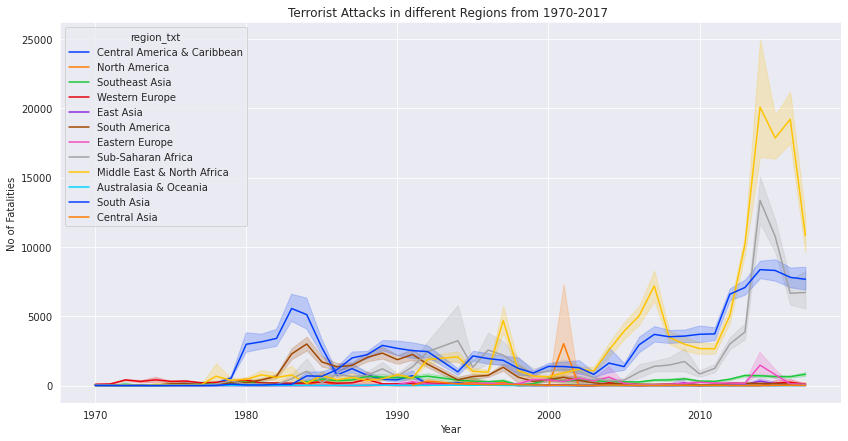

In [105]:
fig, ax = plt.subplots(figsize = (14,7))
sns.lineplot(x='iyear', y='nkill',data= gta_df, hue='region_txt',estimator= np.sum, palette= 'bright')
plt.title("Terrorist Attacks in different Regions from 1970-2017 ")
plt.ylabel("No of Fatalities")
plt.xlabel("Year")

**Making sense of the data above**

Orange line spike near the 2000 indicates september 11 attacks in USA

Yellow line spike between mid 2000's and 2010 the war tensions refers to the battle of gaza bw Hamas and Fatah. 2009 the gaza war ended explaining the dip

The Yellow line peaks again in 2010  with Syrian Civil War(2011) and Iraqui Civil War(2013-2017)

The decades from 1980 to 2000 sees 

#Analysing the Types of Terror Attacks

##Total Number of Attacks for each Type of Attack 

Text(0.5, 0, 'Attack Type')

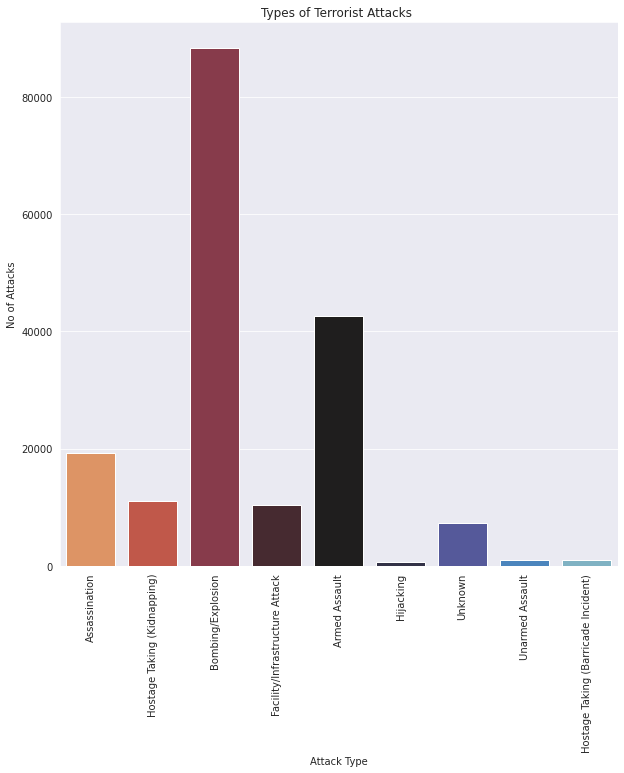

In [106]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'attacktype1_txt', y = 'eventid', data= gta_df, estimator= np.count_nonzero, palette = 'icefire_r')
plt.xticks(rotation = 90)
plt.title("Types of Terrorist Attacks ")
plt.ylabel("No of Attacks")
plt.xlabel("Attack Type")

The top 3 most comonly perpetrated types of attack are

1. Bombing/Explosion (more than twice as frequent than Armed Assault)
2. Armed Assault (twice as frequent than Assassinations)
3. Assassination

The frequency of the top 3 attacks increase by twofolds as we move up the ladder  

##Visualizing the extent of the Top 3 commonly perpetrated attacks in different regions of the country

In [107]:
col= [ 'Bombing/Explosion','Armed Assault', 'Assassination']

Text(0.5, 0, 'Attack Type')

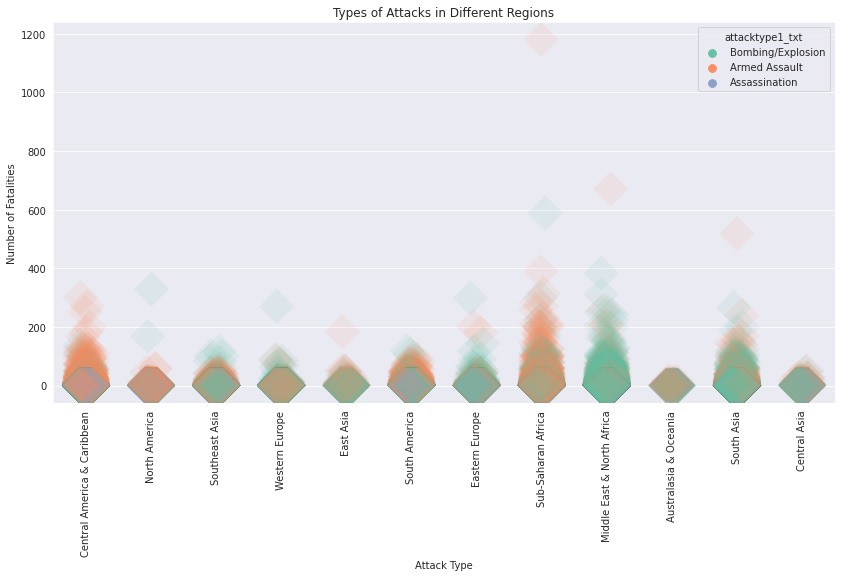

In [108]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (14,7))
sns.stripplot(x ='region_txt', y ='nkill', data = gta_df,hue='attacktype1_txt', hue_order= col,
              palette="Set2", 
              size=25, 
              marker="D",
              edgecolor="gray", alpha=.10)

plt.xticks(rotation=90)
plt.title("Types of Attacks in Different Regions")
plt.ylabel('Number of Fatalities')
plt.xlabel('Attack Type')

Armed Assault is a dominant type of attack in regions like
 1. Central America & Caribbean
 2. Sub-Saharan Africa
 and
 3. North America

(presence of dense orange)

Bombings/Explosion is a dominant type of attack in regions like 
1. Middle East & North Africa
2. South Asia
and
3. Eastern Europe

# Analysing Target Types

##Analyzing Target Types by Fatalities and Wounded

In [109]:
df = gta_df.groupby(['targtype1_txt']).agg({'nkill': 'sum', 'nwound':'sum'}).reset_index()

Text(0, 0.5, 'Number of Fatalities')

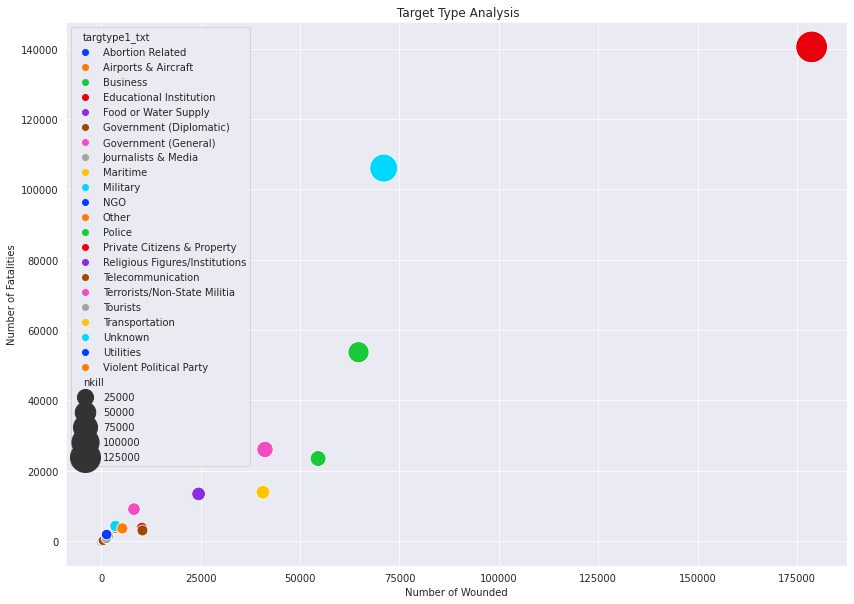

In [110]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (14,10))

sns.scatterplot(x = df['nwound'],y = df['nkill'], hue = df['targtype1_txt'], size= df['nkill'],sizes = (100,1000), palette= 'bright')
plt.title(" Target Type Analysis")
plt.xlabel("Number of Wounded")
plt.ylabel("Number of Fatalities")

Most Affected Target Types are
1. Private Citizens & Property	
2. Military	
3. Police	

#Conclusion




1)  The Civil War between Iraq and Islamic State of Iraq and the Levant (ISIL) has claimed 1570 fatalities, the largest taken in any terror attack

2)  The top 20% of the Terrorist Organisations have contributed to almost 99% of the crimes. This clearly shows the unequal relationship between actions and consequences proving Pareto's Principle

3)  The most notorious terrorist organisations are

    * Islamic State of Iraq and the Levant (ISIL)

    * Taliban

    * Boko Haram

    * Shining Path(SL)
      
These organisations alone have contributed to more than one third of the total fatalities and almost 50% of the total attacks

 4) 

 
    * Islamic State of Iraq and the Levant (ISIL) and Taliban are active from the mid 2010's and Boko Haram are active from 2010.

    * Liberation Tigers of Tamil Eelam (LTTE) are active from late 1980's. Their attacks peaked in mid 1990's and reduced in 2000's.

    * The Irish Republican Army (IRA) have made their attacks constantly from 1970's to 1980's.

5)

    *  Global Terrorism started increasing to an all time high from 2011. This peaked in the year 2014 and started dipping ever since.

    *  The regions: South Asia and Middle East & North Africa, play a substantial role in Global Terrorism

6) The top 3 most comonly perpetrated types of attack are

    * Bombing/Explosion (more than twice as frequent than Armed Assault)

    * Armed Assault (twice as more frequent than Assassinations)

    * Assassination
    
The frequency of the top 3 attacks increase by twofolds as we move up the ladder

7) 

    * Armed Assault is a dominant type of attack in Central America & Caribbean.

    * Bombings/Explosion is a dominant type of attack in Middle East & North Africa


8)  Most Affected Target types are

    * Private Citizens & Property

    * Military

    * Police




